# Nifty Monthly and Quarterly Returns Heatmap Generation 

[*********************100%%**********************]  1 of 1 completed


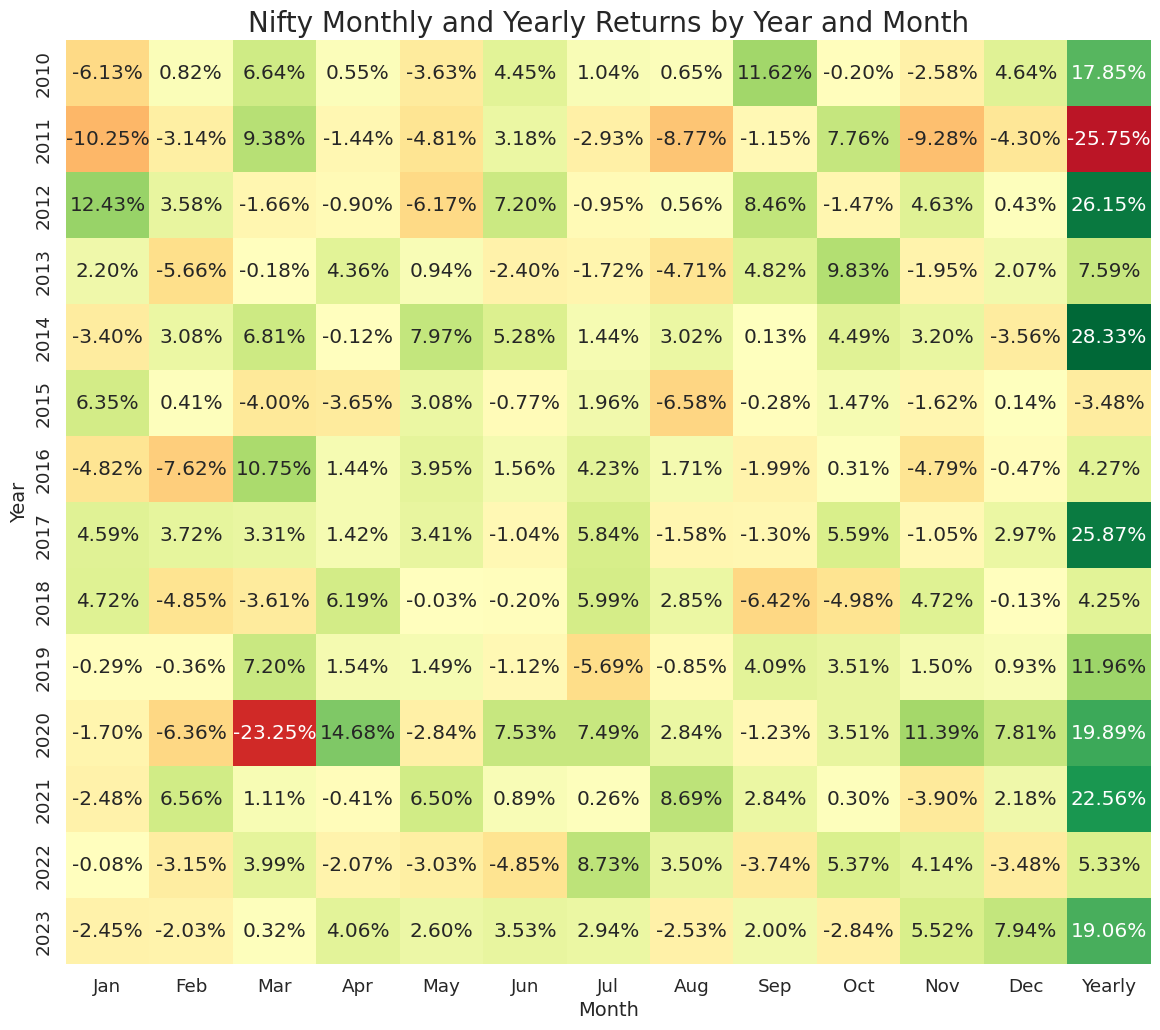

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ticker = "^NSEI"
start_date = "2009-12-31"
end_date = "2024-01-01"

# Download the historical data for Nifty Index
data = yf.download(ticker, start=start_date, end=end_date)

# Resample the data on a monthly basis
data_monthly = data.resample('M').last()

# Calculate the monthly returns
monthly_returns = data_monthly['Adj Close'].pct_change()

# Convert monthly returns to a pandas DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns)

# Pivot the DataFrame to create a matrix of monthly returns by year and month
monthly_returns_matrix = monthly_returns_df.pivot_table(values='Adj Close', index=monthly_returns_df.index.year, columns=monthly_returns_df.index.month)

# Set the column names to the month names
monthly_returns_matrix.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the sum of monthly returns for each year
yearly_returns = monthly_returns_df.groupby(monthly_returns_df.index.year)['Adj Close'].sum()

# Add the yearly returns to the matrix as a new column
monthly_returns_matrix['Yearly'] = yearly_returns

# Set the font scale
sns.set(font_scale=1.2)

# Plot the heatmap using seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(monthly_returns_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2%', cbar=False)
plt.title('Nifty Monthly and Yearly Returns by Year and Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()

# NIFTY Quartely Results

[*********************100%%**********************]  1 of 1 completed


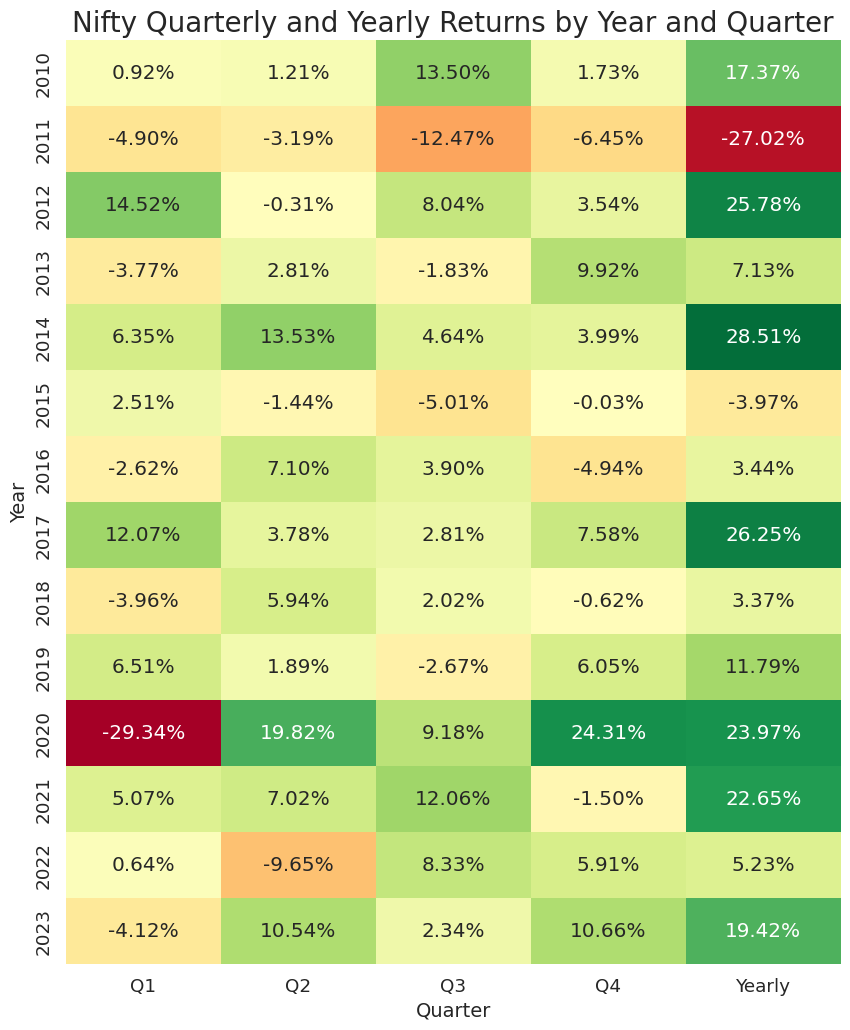

In [3]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ticker = "^NSEI"
start_date = "2009-12-31"
end_date = "2024-01-01"

# Download the historical data for Reliance Industries Limited's stock
data = yf.download(ticker, start=start_date, end=end_date)

# Resample the data on a quarterly basis
data_quarterly = data.resample('Q').last()

# Calculate the quarterly returns
quarterly_returns = data_quarterly['Adj Close'].pct_change()

# Convert quarterly returns to a pandas DataFrame
quarterly_returns_df = pd.DataFrame(quarterly_returns)

# Pivot the DataFrame to create a matrix of quarterly returns by year and quarter
quarterly_returns_matrix = quarterly_returns_df.pivot_table(values='Adj Close', index=quarterly_returns_df.index.year, columns=quarterly_returns_df.index.quarter)

# Set the column names to the quarter names
quarterly_returns_matrix.columns = ['Q1', 'Q2', 'Q3', 'Q4']

# Calculate the yearly returns as the sum of all quarterly returns for that year
yearly_returns = quarterly_returns_df.groupby(quarterly_returns_df.index.year)['Adj Close'].sum()

# Add the yearly returns to the matrix as a new column
quarterly_returns_matrix['Yearly'] = yearly_returns

# Set the font scale
sns.set(font_scale=1.2)

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(quarterly_returns_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2%', cbar=False)
plt.title('Nifty Quarterly and Yearly Returns by Year and Quarter', fontsize=20)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()